In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 


In [89]:
df = pd.read_csv('../data/subdataset_Biro_Daniel.csv')

In [90]:
df.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [91]:
selected_features = ['OpenPorchSF', 'WoodDeckSF']

In [92]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_features])

In [93]:
from sklearn.cluster import KMeans


inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

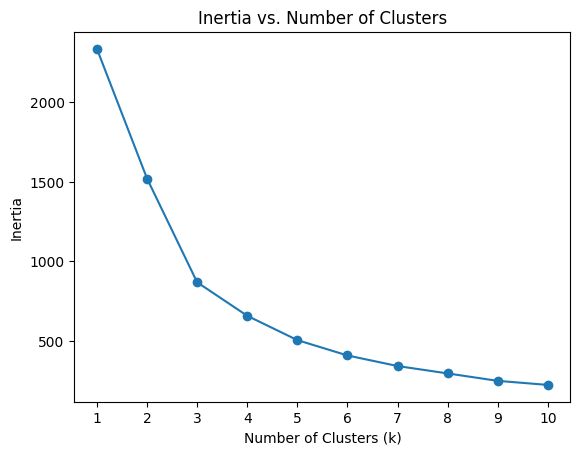

In [94]:
from matplotlib import pyplot as plt


plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

The best k would be around 3, 4 or 5.

In [95]:
df['Cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(scaled_data)

In [96]:
cluster_count = df['Cluster'].value_counts()

cluster_stats = df.groupby('Cluster').agg({
  'SalePrice': ['mean', 'median', 'std', 'count'],
  # selected_features: ['mean']
})
cluster_stats

SalePrice                              
                  mean    median           std count
Cluster                                             
0        222384.398058  189000.0  96302.532853   103
1        207246.910345  191000.0  81288.161780   145
2        206720.553977  190000.0  79503.766540   352
3        151763.540493  140000.0  57214.141548   568

In [97]:
selected_features_mean = df.groupby('Cluster')[selected_features].mean()
selected_features_mean

,OpenPorchSF,WoodDeckSF
Cluster,,
0,47.262136,395.893204
1,190.510345,54.710345
2,41.196023,171.772727
3,19.216549,5.091549


In [98]:
import plotly.express as px

px.scatter(df, x='OpenPorchSF', y='WoodDeckSF', color='Cluster', title='K-Means Clustering of Houses')

In [99]:
px.box(df, x='Cluster', y='SalePrice', title='Sale Price Distribution by Cluster')

Clustering was performed using K-Means algorithm, and the optimal number of clusters was determined using the elbow method. The clusters were then analyzed based on their average sale prices and other selected features to understand the characteristics of each cluster. Visualizations such as scatter plots and box plots were created to illustrate the clustering results and the distribution of sale prices across different clusters.

For n_clusters = 2, the silhouette score is 0.44544688122912224
For n_clusters = 3, the silhouette score is 0.5103921681675007
For n_clusters = 4, the silhouette score is 0.5066018859191439
For n_clusters = 5, the silhouette score is 0.5211330234014819
For n_clusters = 6, the silhouette score is 0.5409004976190808
For n_clusters = 7, the silhouette score is 0.5438323042238372
For n_clusters = 8, the silhouette score is 0.5371283623461435
For n_clusters = 9, the silhouette score is 0.5500169997736349
For n_clusters = 10, the silhouette score is 0.5380603718975113


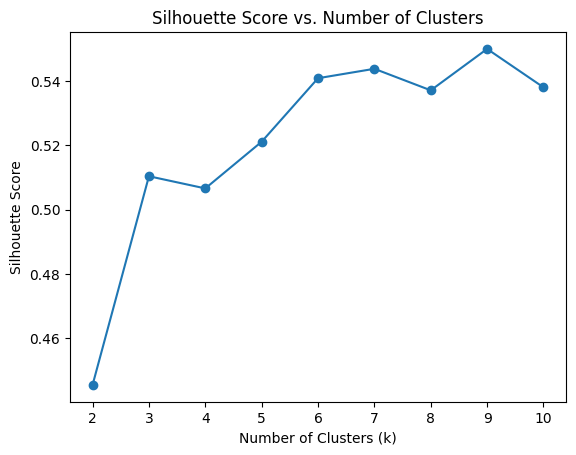

In [100]:
# silhuette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    df['Cluster'] = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
    print(f'For n_clusters = {k}, the silhouette score is {silhouette_avg}')
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

Optimal k value that maximizes silhouette score: 9

The k value obtained from the elbow method and the optimal k value that maximizes silhouette score differs: first is 4, second is 9. 

In [101]:
kmeans_silhouette = KMeans(n_clusters=9, random_state=42).fit(scaled_data)
df['Silhouette'] = kmeans_silhouette.fit_predict(scaled_data)

In [102]:
px.scatter(df, x='OpenPorchSF', y='WoodDeckSF', color='Silhouette', title='K-Means Clustering of Houses (Silhouette)')

In [103]:
px.box(df, x='Silhouette', y='SalePrice', title='Sale Price Distribution by Silhouette Cluster')

Optimal k for silhouette score was 9, silhouette score was 0.55. 

## Lab 10 Noiembrie

In [104]:
df

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster,Silhouette
0,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000,0,0
1,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000,1,1
2,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000,9,0
3,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000,5,5
4,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432,5,5
1164,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000,9,0
1165,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000,5,5
1166,0,240,0,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950,4,4


In [105]:
df.groupby("Cluster")["SalePrice"].mean()

Cluster
0    192465.983740
1    178989.710692
2    253737.878788
3    212354.500000
4    212102.019608
5    138169.069333
6    194159.748663
7    249145.333333
8    188467.193182
9    212389.035714
Name: SalePrice, dtype: float64

In [106]:
df = df.drop('SalePrice', axis=1)

In [107]:
df

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Cluster,Silhouette
0,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0,0
1,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1,1
2,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,9,0
3,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,5,5
4,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,5,5
1164,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,9,0
1165,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,5,5
1166,0,240,0,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,4,4


In [108]:
import pandas as pd

df.to_csv('../data/subset_classification_biro_daniel.csv', index=False)

In [109]:
new_df = pd.read_csv('../data/subset_classification_biro_daniel.csv')
new_df

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Cluster,Silhouette
0,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0,0
1,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1,1
2,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,9,0
3,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,5,5
4,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,5,5
1164,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,9,0
1165,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,5,5
1166,0,240,0,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,4,4


In [110]:
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns.drop('Cluster')
categorical_cols = new_df.select_dtypes(include=['object']).columns

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]
)

preprocessor = ColumnTransformer(
    transformers=[  
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
]
)

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
]
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
]
)

In [113]:
X = new_df.drop('Cluster', axis=1)
y = new_df['Cluster']

In [114]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
lg_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [116]:
y_pred_lg = lg_pipeline.predict(X_test)
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

In [117]:
print("Accuracy of Logistic Regression:", lg_pipeline.score(X_test, y_test))
print("Accuracy of Decision Tree:", dt_pipeline.score(X_test, y_test))
print("Accuracy of Random Forest:", rf_pipeline.score(X_test, y_test))

Accuracy of Logistic Regression: 0.9188034188034188
Accuracy of Decision Tree: 0.9700854700854701
Accuracy of Random Forest: 0.9829059829059829


In [120]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy of XGBoost:", accuracy_score(y_test, pred))

Accuracy of XGBoost: 0.9914529914529915


In [121]:
grid_search_params = {    
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [5, 10, 15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

In [122]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid_search_params,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    verbose=2
)

In [123]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2, ...], 'max_depth': [4, 6], 'min_child_weight': [3, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [124]:
print("Best params: ", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

Best params:  {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 15, 'subsample': 0.7}


In [129]:
from sklearn.metrics import f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print("Tuned Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average="weighted")
print("Tuned F1 Score:", f1)

recall = recall_score(y_test, y_pred, average="weighted")
print("Tuned Recall:", recall)

precision = precision_score(y_test, y_pred, average="weighted")
print("Tuned Precision:", precision)

Tuned Accuracy: 0.9829059829059829
Tuned F1 Score: 0.9808534296664118
Tuned Recall: 0.9829059829059829
Tuned Precision: 0.9812147112147113


c:\work\infoworld\infoworld\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

